# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nafa Khairunnisa
- **Email:** nkhairunn2412@gmail.com
- **ID Dicoding:** nafa-khairunnisa

## Menentukan Pertanyaan Bisnis

1. Pada hari apa pelanggan paling banyak dan paling sedikit menyewa sepeda?
2. Bagaimana tren sewa sepeda dalam beberapa bulan terakhir?
3. Bagaimana perbedaan jumlah casual dengan registered?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Beberapa library yang digunakan:
- Numpy digunakan untuk perhitungan numerik.
- Pandas digunakan untuk membaca, menyimpan, dan menganalisis dataset dalam bentuk dataframe.
- Matplotlib digunakan untuk membuat berbagai jenis visualisasi data, seperti line chart, histogram, dan scatter plot.
- Seaborn digunakan untuk mempercantik dan memperjelas visualisasi data, seperti boxplot, heatmap, dan bar chart.

## Data Wrangling

### Gathering Data

Tahap ini dilakukan untuk membaca dataset yang sudah ada yaitu day.csv dan hour.csv

In [2]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv memiliki 16 parameter di antaranya :
 - instant = Nomor penyewaan
 - dteday = Tanggal sewa dengan format "YYYY-MM-DD"
 - season = Musim penyewaan
 - yr = Tahun penyewaan
 - mnth = Bulan penyewaan
 - holiday = Sewa di hari libur
 - weekday = Hari dalam seminggu
 - workingday = Sewa di hari kerja
 - weathersit = Kondisi cuaca
 - temp = Temperatur cuaca
 - atemp = Rasa temperatur cuaca
 - hum = Kelembapan
 - windspeed = Kecepatan angin
 - casual = Pengguna langganan
 - registered = Pengguna yang terdaftar
 - cnt = Jumlah sepeda yang disewa (Casual dan registered)

- Dataset hour.csv memiliki 16 parameter yang sama dengan day.csv. Yang membedakan hanya penambahan parameter hr yang berarti hour (jam sewa).

### Assessing Data

Tahap ini dilakukan untuk menilai kualitas suatu data yang mana di sini day_df dan hour_df

Dataset Day

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.duplicated().sum()

0

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dataset Hour

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
hour_df.duplicated().sum()

0

In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dataset Day memiliki total 731 data tanpa nilai NaN dan tanpa data yang duplikat. Tipe data parameter dteday masih berupa object. Sisanya memiliki tipe data int dan float.
- Dataset Hour memiliki total 17379 data, tidak memiliki nilai NaN dan tidak ada data yang duplikat. Tipe data parameter dteday masih berupa object. Sama seperi day.csv, sisanya memiliki tipe data int dan float.

### Cleaning Data

**Insight:**
Berikut beberapa tahapan clenaing data yang dilakukan:
- Parameter dteday pada dataset Day dan Hour perlu diubah menjadi datetime agar proses analisis menjadi lebih baik.
- Mengubah tipe data season, mnth, weekday, dan weathersit dari int menjadi category untuk memperjelas atribut dari setiap parameter.
- Mengubah atribut parameter yr dari 0,1 menjadi 2011,2012
- Mengubah nilai atribut data season, mnth, weekday, weathersit, holiday, dan workingday.

In [10]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [26]:
columns = ['season', 'mnth', 'weekday', 'holiday', 'workingday', 'weathersit']

for col in columns:
    day_df[col] = day_df[col].astype("category")

In [27]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

In [13]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [28]:
for col in columns:
    hour_df[col] = hour_df[col].astype("category")

In [29]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [30]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,Januari,0,Sabtu,0,Berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,2011,Januari,0,Minggu,0,Berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,2011,Januari,0,Senin,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,Januari,0,Selasa,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,Januari,0,Rabu,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Untuk mengidentifikasi hari perlu dilihat dari tanggalnya. Menurut kalender, tanggal 1 Januari 2011 jatuh pada hari Sabtu yang dimana di sini diidentifikasi sebagai nilai 6 pada weekday.
- Sehingga identifikasi nilai pada weekday adalah sebagai berikut:
  - 0: Minggu
  - 1: Senin
  - 2: Selasa
  - 3: Rabu
  - 4: Kamis
  - 5: Jumat
  - 6: Sabtu

In [17]:
# Mengubah nilai atribut yr
day_df['yr'].replace({0: 2011, 1: 2012}, inplace=True)
hour_df['yr'].replace({0: 2011, 1: 2012}, inplace=True)

<ipython-input-17-b6fe49025d73>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df['yr'].replace({0: 2011, 1: 2012}, inplace=True)
<ipython-input-17-b6fe49025d73>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [18]:
# Mengubah nilai atribut season
day_df['season'].replace({1:"Musim Semi", 2:"Musim Panas", 3:"Musim Gugur", 4:"Musim Dingin"}, inplace=True)
hour_df['season'].replace({1:"Musim Semi", 2:"Musim Panas", 3:"Musim Gugur", 4:"Musim Dingin"}, inplace=True)

<ipython-input-18-e6c06aaef43b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df['season'].replace({1:"Musim Semi", 2:"Musim Panas", 3:"Musim Gugur", 4:"Musim Dingin"}, inplace=True)
<ipython-input-18-e6c06aaef43b>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['season'].replace({1:"Musim Semi", 2:"M

In [24]:
# Mengubah nilai atribut mnth
day_df['mnth'].replace({1:"Januari", 2:"Februari", 3:"Maret", 4:"April", 5:"Mei", 6:"Juni", 7:"Juli", 8:"Agustus", 9:"September", 10:"Oktober", 11:"November", 12:"Desember"}, inplace=True)
hour_df['mnth'].replace({1:"Januari", 2:"Februari", 3:"Maret", 4:"April", 5:"Mei", 6:"Juni", 7:"Juli", 8:"Agustus", 9:"September", 10:"Oktober", 11:"November", 12:"Desember"}, inplace=True)

<ipython-input-24-15bb920da27e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df['mnth'].replace({1:"Januari", 2:"Februari", 3:"Maret", 4:"April", 5:"Mei", 6:"Juni", 7:"Juli", 8:"Agustus", 9:"September", 10:"Oktober", 11:"November", 12:"Desember"}, inplace=True)
<ipython-input-24-15bb920da27e>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser

In [20]:
# Mengubah nilai atribut weekday
day_df['weekday'].replace({0:"Minggu", 1:"Senin", 2:"Selasa", 3:"Rabu", 4:"Kamis", 5:"Jumat", 6:"Sabtu"}, inplace=True)
hour_df['weekday'].replace({0:"Minggu", 1:"Senin", 2:"Selasa", 3:"Rabu", 4:"Kamis", 5:"Jumat", 6:"Sabtu"}, inplace=True)

<ipython-input-20-e69b4f47268c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df['weekday'].replace({0:"Minggu", 1:"Senin", 2:"Selasa", 3:"Rabu", 4:"Kamis", 5:"Jumat", 6:"Sabtu"}, inplace=True)
<ipython-input-20-e69b4f47268c>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['weekday'].replace({0:"Mingg

In [21]:
# Mengubah nilai atribut weathersit
day_df['weathersit'].replace({1:"Cerah", 2:"Berkabut", 3:"Hujan atau salju ringan", 4:"Hujan atau salju lebat"}, inplace=True)
hour_df['weathersit'].replace({1:"Cerah", 2:"Berkabut", 3:"Hujan atau salju ringan", 4:"Hujan atau salju lebat"}, inplace=True)

<ipython-input-21-c787dfd0c863>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df['weathersit'].replace({1:"Cerah", 2:"Berkabut", 3:"Hujan atau salju ringan", 4:"Hujan atau salju lebat"}, inplace=True)
<ipython-input-21-c787dfd0c863>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['weathersit'].replace

In [34]:
# Mengubah nilai atribut holiday dan workingday
day_df[['holiday', 'workingday']] = day_df[['holiday', 'workingday']].replace({0: "Tidak", 1: "Ya"})
hour_df[['holiday', 'workingday']] = hour_df[['holiday', 'workingday']].replace({0: "Tidak", 1: "Ya"})

<ipython-input-34-b87a967fd613>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df[['holiday', 'workingday']] = day_df[['holiday', 'workingday']].replace({0: "Tidak", 1: "Ya"})
<ipython-input-34-b87a967fd613>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df[['holiday', 'workingday']] = day_df[['holiday', 'workingday']].replace({0: "Tidak", 1: "Ya"})
<ipython-input-34-b87a967fd613>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that pr

In [117]:
day_df.to_csv("day_df_clean.csv", index=False)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,Januari,Tidak,Sabtu,Tidak,Berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,2011,Januari,Tidak,Minggu,Tidak,Berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,2011,Januari,Tidak,Senin,Ya,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,Januari,Tidak,Selasa,Ya,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,Januari,Tidak,Rabu,Ya,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [116]:
hour_df.to_csv("hour_df_clean.csv", index=False)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,Januari,0,Tidak,Sabtu,Tidak,Cerah,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Musim Semi,2011,Januari,1,Tidak,Sabtu,Tidak,Cerah,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Musim Semi,2011,Januari,2,Tidak,Sabtu,Tidak,Cerah,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Musim Semi,2011,Januari,3,Tidak,Sabtu,Tidak,Cerah,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Musim Semi,2011,Januari,4,Tidak,Sabtu,Tidak,Cerah,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [36]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Musim Gugur,NaN,Januari,Tidak,Minggu,Ya,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pengguna sewa sepeda casual berkisar antara 2 sampai 3410 orang per hari. Dengan rata-rata 848.17 orang dan standar deviasi 686.62 orang. Artinya orang yang menyewa sepeda dengan kategori casual dalam sehari bervariasi dan pernah menyentuh 3410 sepeda.
- Pengguna sewa sepeda yang terdaftar sebanyak 20 sampai 6946 orang per hari. Dengan rata-rata 3656.17 orang dan standar deviasi 1560.25. Artinya pengguna yang terdaftar lebih sering menyewa sepeda dalam jumlah yang banyak dalam sehari.
- Selain itu, sewa sepeda paling sering (modus) terjadi di Musim Gugur.

In [38]:
day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

<ipython-input-38-84eb3aac9717>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="weekday").agg({


,instant,casual,registered,cnt
weekday,,,,
Minggu,105,140521,303506,444027
Senin,105,70784,384719,455503
Selasa,104,57843,411266,469109
Rabu,104,57319,415729,473048
Kamis,104,61460,423935,485395
Jumat,104,78238,409552,487790
Sabtu,105,153852,323955,477807


**Insight:**
- Berdasarkan pengelompokkan hari, penyewa casual paling banyak menyewa sepeda di hari Sabtu dan Minggu yang merupakan akhir pekan.
- Sedangkan penyewa registered (terdaftar) paling banyak menyewa sepeda di hari Rabu dan Kamis yang merupakan hari biasa.
- Total penyewa terbanyak di hari Jumat.

In [39]:
day_df.groupby(by="yr").agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum"
})

,instant,casual,registered
yr,,,
2011,365,247252,995851
2012,366,372765,1676811


**Insight:**
- Berdasarkan pengelompokkan hari kerja, penyewa casual dan registered lebih banyak menyewa sepeda di tahun 2012 dibandingkan tahun 2011.

In [40]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["sum", "mean"]
})

<ipython-input-40-db3dabe5ab6c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").agg({


instant      cnt             
             nunique      sum         mean
season                                    
Musim Semi       181   471348  2604.132597
Musim Panas      184   918589  4992.331522
Musim Gugur      188  1061129  5644.303191
Musim Dingin     178   841613  4728.162921

**Insight:**
- Berdasarkan pengelompokkan musim, sewa sepeda tertinggi terjadi di musim gugur dengan rata-rata 5644.30.
- Musim semi adalah musim yang paling sedikit orang menyewa sepeda.

### Explore Data hour_df

In [41]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Musim Gugur,NaN,Mei,NaN,Tidak,Sabtu,Ya,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pengguna sewa sepeda casual berkisar antara 0 sampai 367 orang per jam. Dengan rata-rata 35.67 orang dan standar deviasi 49.30 orang. Artinya orang yang menyewa sepeda dengan kategori casual dalam sejam bervariasi dan pernah menyentuh 367 sepeda.
- Pengguna sewa sepeda yang terdaftar sebanyak 0 sampai 886 orang per jam. Dengan rata-rata 153.7 orang dan standar deviasi 151.35. Artinya pengguna yang terdaftar lebih sering menyewa sepeda dalam jumlah yang banyak dalam sejam.

In [43]:
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "casual": ["sum", "mean"],
    "registered": ["sum", "mean"],
    "cnt": ["sum", "mean"]
})

instant casual            registered                 cnt            
   nunique    sum       mean        sum        mean     sum        mean
hr                                                                     
0      726   7375  10.158402      31755   43.739669   39130   53.898072
1      724   4709   6.504144      19455   26.871547   24164   33.375691
2      715   3412   4.772028      12940   18.097902   16352   22.869930
3      697   1893   2.715925       6281    9.011478    8174   11.727403
4      697    874   1.253945       3554    5.098996    4428    6.352941
5      717   1012   1.411437      13249   18.478382   14261   19.889819
6      725   3017   4.161379      52115   71.882759   55132   76.044138
7      727   8037  11.055021     146134  201.009629  154171  212.064649
8      727  15761  21.679505     245240  337.331499  261001  359.011004
9      727  22458  30.891334     136980  188.418157  159438  219.309491
10     727  33789  46.477304      92468  127.191197  126257  173.668501
11     727  43286  59.540578     108034  148.602476  151320  208.143054
12     728  49718  68.293956     134696  185.021978  184414  253.315934
13     729  52713  72.308642     132206  181.352538  184919  253.661180
14     729  55089  75.567901     120563  165.381344  175652  240.949246
15     729  54606  74.905350     128543  176.327846  183149  251.233196
16     730  53834  73.745205     173914  238.238356  227748  311.983562
17     730  54220  74.273973     282640  387.178082  336860  461.452055
18     728  44496  61.120879     265276  364.390110  309772  425.510989
19     728  35505  48.770604     191284  262.752747  226789  311.523352
20     728  26378  36.233516     138172  189.796703  164550  226.030220
21     728  20570  28.255495     104875  144.059066  125445  172.314560
22     728  16200  22.252747      79412  109.082418   95612  131.335165
23     728  11065  15.199176      52876   72.631868   63941   87.831044

**Insight:**
- Berdasarkan jam sewa, penyewa sepeda casual terbanyak di jam 14 dengan total 55089 orang.
- Penyewa registered (terdaftar) lebih banyak menyewa sepeda di jam 17 dengan total 282640 orang.
- Secara keseluruhan, total penyewa sepeda terbanyak terjadi di jam 17 sebanyak 336860 dengan rata-rata	461.45.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada hari apa pelanggan paling banyak dan paling sedikit menyewa sepeda?

In [93]:
sum_rent_weekday = day_df.groupby("weekday").cnt.sum().sort_values(ascending=False).reset_index()
sum_rent_weekday.head(7)

<ipython-input-93-3c8fbf51734c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_rent_weekday = day_df.groupby("weekday").cnt.sum().sort_values(ascending=False).reset_index()


,weekday,cnt
0,Jumat,487790
1,Kamis,485395
2,Sabtu,477807
3,Rabu,473048
4,Selasa,469109
5,Senin,455503
6,Minggu,444027


<ipython-input-94-c07aff2d5a7e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="weekday", data=sum_rent_weekday, palette=colors, ax=ax)
<ipython-input-94-c07aff2d5a7e>:5: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="cnt", y="weekday", data=sum_rent_weekday, palette=colors, ax=ax)


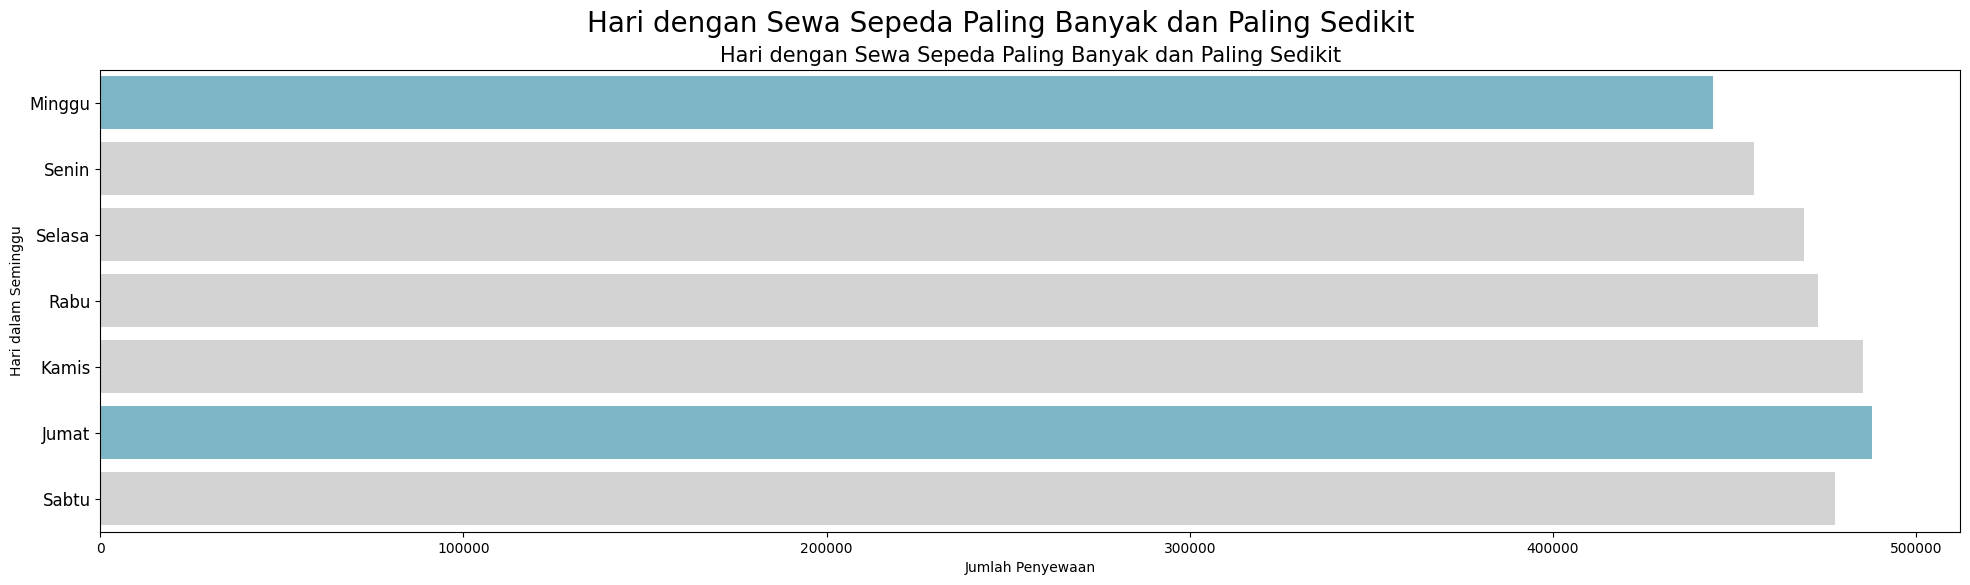

In [94]:
fig, ax = plt.subplots(figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="cnt", y="weekday", data=sum_rent_weekday, palette=colors, ax=ax)
ax.set_ylabel("Hari dalam Seminggu")
ax.set_xlabel("Jumlah Penyewaan")
ax.set_title("Hari dengan Sewa Sepeda Paling Banyak dan Paling Sedikit", loc="center", fontsize=15)
ax.tick_params(axis='y', labelsize=12)

plt.suptitle("Hari dengan Sewa Sepeda Paling Banyak dan Paling Sedikit", fontsize=20)
plt.show()

**Insight:**
- Berdasarkan visualisasi data, hari dengan sewa paling banyak yaitu hari Jumat dengan nilai 487790 kali sewa.
- Untuk nilai terendah yaitu di hari Minggu dengan nilai 444027 kali sewa.

### Pertanyaan 2: Bagaimana tren sewa sepeda dalam beberapa bulan terakhir?

<ipython-input-70-29de17dd8544>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rent_df = day_df.resample(rule='M', on='dteday').agg({


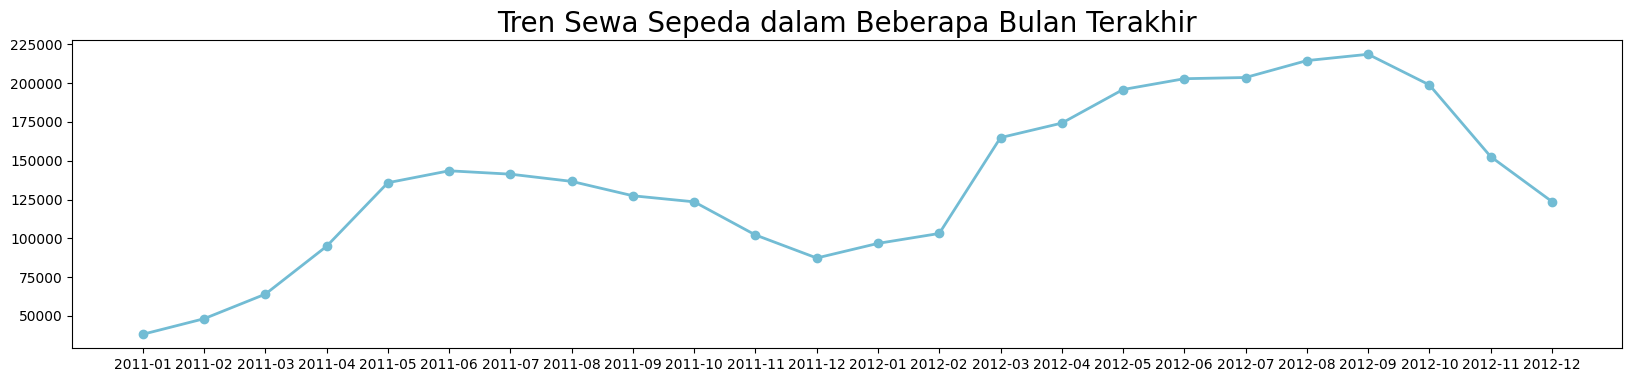

In [70]:
monthly_rent_df = day_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
}).reset_index()

monthly_rent_df["dteday"] = monthly_rent_df["dteday"].dt.strftime('%Y-%m')

plt.figure(figsize=(20, 4))
plt.plot(monthly_rent_df["dteday"], monthly_rent_df["cnt"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Tren Sewa Sepeda dalam Beberapa Bulan Terakhir", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
- Berdasarkan visualisasi data, tren sewa sepeda mengalami fluktuasi.
- Nilai tertinggi di bulan September tahun 2012 dan terendah di bulan Januari tahun 2011.
- Pada bulan Oktober-Desember 2012, sewa sepeda mengalami penurunan yang signifikan.

### Pertanyaan 3: Bagaimana perbedaan jumlah casual dengan registered?

In [105]:
sum_rent_users = day_df[["casual", "registered"]].sum()
sum_rent_users

,0
casual,620017
registered,2672662


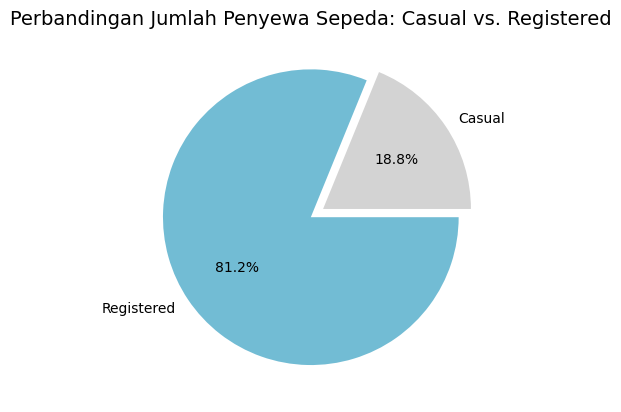

In [111]:
colors = ["#D3D3D3", "#72BCD4"]

users = ["Casual", "Registered"]
explode = (0.1, 0)

plt.pie(
    x=sum_rent_users,
    labels=users,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)

plt.title("Perbandingan Jumlah Penyewa Sepeda: Casual vs. Registered", fontsize=14)
plt.show()

**Insight:**
- Berdasarkan pie chart di atas, jumlah resgitered users lebih banyak dengan persentase 81.2% dibandingkan casual users dengan persentase 18.8%.

## Analisis Lanjutan (Clustering)

In [114]:
seasonal_rent_df = day_df.groupby("season")[["casual", "registered", "cnt"]].sum().reset_index()
seasonal_rent_df

<ipython-input-114-6c7fae8166fd>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_rent_df = day_df.groupby("season")[["casual", "registered", "cnt"]].sum().reset_index()


,season,casual,registered,cnt
0,Musim Semi,60622,410726,471348
1,Musim Panas,203522,715067,918589
2,Musim Gugur,226091,835038,1061129
3,Musim Dingin,129782,711831,841613


**Insight:**
- Berdasarkan pengelompokkan sederhana di atas, musim gugur memegang puncak sewa tertinggi.
- Musim Semi merupakan musim dengan jumlah sewa terendah.
- Di setiap musim, jumlah registered users lebih banyak dibandingkan casual users.
- Artinya, orang-orang lebih banyak memilih untuk menyewa sepeda di musim gugur dibandingkan musim lainnya.

## Conclusion

- Kesimpulan pertanyaan 1: Pada hari apa dan jam berapa pelanggan banyak menyewa sepeda?
Berdasarkan visualisasi data, hari dengan sewa paling banyak yaitu hari Jumat dengan nilai 487790 kali sewa.

- Kesimpulan pertanyaan 2: Bagaimana tren sewa sepeda dalam beberapa bulan terakhir?
Berdasarkan visualisasi data, tren sewa sepeda mengalami fluktuasi dengan nilai tertinggi di bulan September tahun 2012 dan terendah di bulan Januari tahun 2011. Sewa mengalami penurunan signifikan setelah bulan September 2012.

- Kesimpulan pertanyaan 3: Bagaimana perbedaan jumlah casual dengan registered?
Berdasarkan pie chart di atas, jumlah resgitered users lebih banyak dengan persentase 81.2% dibandingkan casual users dengan persentase 18.8%.

- Kesimpulan analisis lanjutan: Orang-orang lebih banyak memilih sewa sepeda di musim gugur dibanding musim lainnya dan registered users daripada casual users di setiap musim.